##GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)




In [228]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
from scipy import stats

import json

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [229]:
#to use the url just pas it to pandas read_excell
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#split your data by male and female, for example you can load the data into 2 dictionaries. Other variables may be relevant: for example race.
#the names are not informative, and i am not giving you any meta data to find out what is in each file. 
# 08_2 files are male, 08_3 are female, and I am leaving in the lines of code that read the male files into races

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9) #%s/pinc03_2_1_1.xls'%url, header=9)
allmales['all'].head(2)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)

In [230]:
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

In [231]:
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

##exploratory phase

In [232]:
#lets see what is in the data
from pandas.tools.plotting import scatter_matrix

#like for the building homework: this fails cause the data is not parsed and formatted propoerly
#so maybe just print the columns to find out
print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [233]:
#Another way to remove non real entries, is to use the np.isreal command, 
#i end up doing it in a for loop, which is ugly.
#think about how you could improve on that if you already have coding experience
#and are used to pythonic ways!

for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

    

/Users/michelleho/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


now you can try again with the scatter matrix and see if there are any insightful correlations. 
please  make and comment the plot


In [234]:
#do the same for females
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/Users/michelleho/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


##to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)

##also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

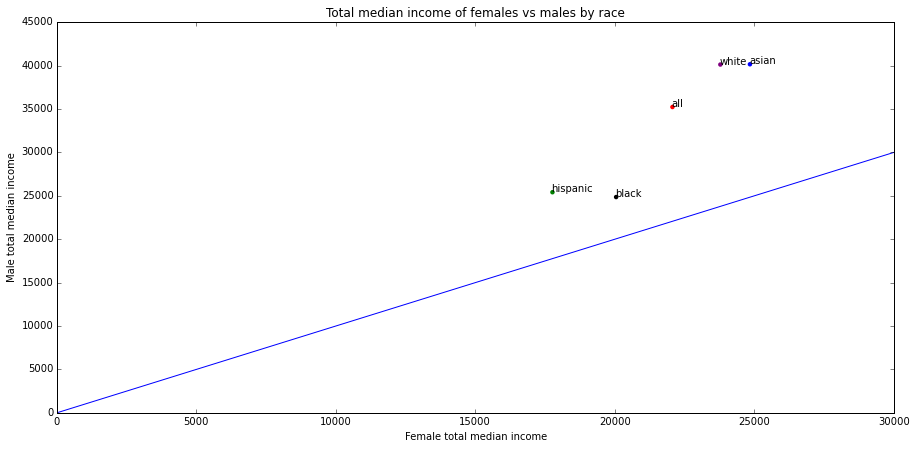

In [241]:
fig = pl.figure(figsize=(15,7))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Male total median income')
ax1.set_xlabel('Female total median income')
ax1.set_title('Total median income of females vs males by race')
ax1.set_ylim([0,45000])
ax1.set_xlim([0,30000])

race_colors = {'all':'red','asian':'blue','black':'black','hispanic':'green','white':'purple'}
#for race in allfemales:
 #   print race

#print allfemales['all'].head(5)
for race in allfemales:
    ax1.scatter(allfemales[race]['Median income'][1],allmales[race]['Median income'][1],s=20,edgecolor='none',color = race_colors[race])
for i,n in enumerate(race_colors):
    ax1.annotate(race_colors.keys()[i], (allfemales[n]['Median income'][1],allmales[n]['Median income'][1]))

    
ax1.plot([0,45000],[0,45000],'-b',label='Line of Equality')

#Now fit it with a line!
you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
if you want to use numpy (and you do not have to!) you can for example use 


pl.plot(newx,np.poly1d(np.ployfit(x,y,1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, like we did in class
    ...
    return y
def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals (difference b/w data and model **2)
    return residuals

you need an initial guess for the parameters, where you start searching. it has to be a single variable, so for 2 parameters make a list of 2 elements. the numbers inside do not have to be 0 and 1 - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

result = minimize(residuals, p0, args=(all_males, all_females))

in args i put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

[ 17762.  22063.  20044.  23780.  24840.]
[ 25411.  35228.  24855.  40122.  40153.]
[  2.50117987e+00  -2.11163005e+04]


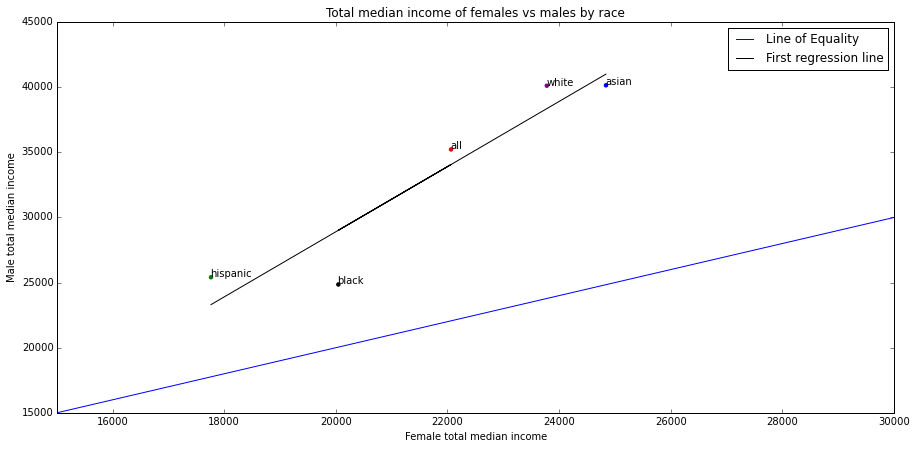

In [245]:
femalePoint = []
malePoint = []

for race in allfemales:
    femalePoint.append(allfemales[race]['Median income'][1])
    malePoint.append(allmales[race]['Median income'][1])
arrayFemalePoint = np.array(femalePoint)
arrayMalePoint = np.array(malePoint)

print arrayFemalePoint
print arrayMalePoint

coefficients = np.polyfit(arrayFemalePoint,arrayMalePoint,1)
print coefficients
polynomial = np.poly1d(coefficients)
newY = polynomial(arrayFemalePoint)

fig = pl.figure(figsize=(15,7))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Male total median income')
ax1.set_xlabel('Female total median income')
ax1.set_title('Total median income of females vs males by race')
ax1.set_ylim([15000,45000])
ax1.set_xlim([15000,30000])

race_colors = {'all':'red','asian':'blue','black':'black','hispanic':'green','white':'purple'}
#for race in allfemales:
 #   print race

#print allfemales['all'].head(5)
for race in allfemales:
    ax1.scatter(allfemales[race]['Median income'][1],allmales[race]['Median income'][1],s=20,edgecolor='none',color = race_colors[race])
for i,n in enumerate(race_colors):
    ax1.annotate(race_colors.keys()[i], (allfemales[n]['Median income'][1],allmales[n]['Median income'][1]))
ax1.plot([0,45000],[0,45000],'-b',label='Line of Equality')
ax1.plot(arrayFemalePoint,newY,linewidth=1,color='black',label='First regression line')
ax1.legend()


##it turns out that there is an analytical solution for the OLS regression it is coded below. please try to read the code and understand the formula! 


In [246]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)

cor = stats.spearmanr(femalePoint, malePoint)
print cor
arrayFemalePoint.std()/arrayMalePoint.std()
beta1=cor[0]*arrayMalePoint.std()/arrayFemalePoint.std()
beta0=arrayMalePoint.mean()-beta1*arrayFemalePoint.mean()

print beta1, beta0

(0.90000000000000002, 0.037386073468498628)
2.39519620495 -18816.6882158


##and plot the line corresponding to the analytical regression to compare it with the result of your numerical one

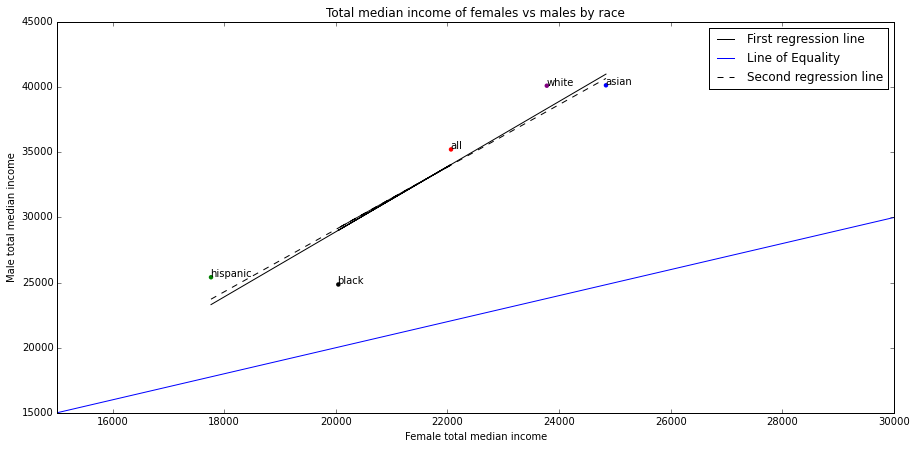

In [251]:
fig = pl.figure(figsize=(15,7))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Male total median income')
ax1.set_xlabel('Female total median income')
ax1.set_title('Total median income of females vs males by race')
ax1.set_ylim([15000,45000])
ax1.set_xlim([15000,30000])

race_colors = {'all':'red','asian':'blue','black':'black','hispanic':'green','white':'purple'}

for race in allfemales:
    ax1.scatter(allfemales[race]['Median income'][1],allmales[race]['Median income'][1],s=20,edgecolor='none',color = race_colors[race])
for i,n in enumerate(race_colors):
    ax1.annotate(race_colors.keys()[i], (allfemales[n]['Median income'][1],allmales[n]['Median income'][1]))


ax1.plot(arrayFemalePoint,newY,linewidth=1,color='black',label='First regression line')

coefficients2 = [beta1,beta0]
polynomial2 = np.poly1d(coefficients2)
anotherY = polynomial2(arrayFemalePoint)
ax1.plot([0,45000],[0,45000],'-b',label='Line of Equality')

ax1.plot(arrayFemalePoint,anotherY,"--k",label='Second regression line')

ax1.legend()

#this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

if you use one data point for source of income (along the 'Median income' column) and fit a line and the line fit is similar then the median income was representative fo all forms of income for this analysis

to unravel the data and concatenate them back together in a single array is a little complex (there may be easier way, this is just wha i came up with. if you have something better please share!!)
here ar a few lines of code that should do the trick. i used nu.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. i also masked the nan values. i used the numpy ma (masled array) package. ever array is associated by this package to a mask array of Bools [True....False...] of the same size. the 

In [183]:
#print allmales['black']['Median income'][:].values
all_median_males=np.ma.array(np.concatenate([allmales['all']['Median income'].values,allmales['white']['Median income'].values,allmales['black']['Median income'].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())

all_median_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

#I am gonna create the mask int he next line. 
#the mask is True where either male or female value is Nan. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

all_mask = [np.isnan(all_median_males) + np.isnan(all_median_females)]

all_median_females.mask = all_mask
all_median_males.mask = all_mask

[  2.50117987e+00  -2.11163005e+04]


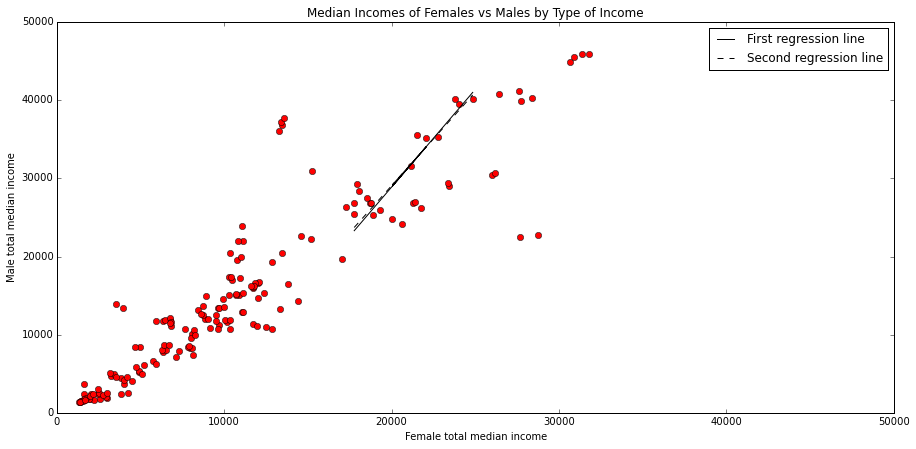

In [252]:
#fit and plot

femalePoint = []
malePoint = []

for race in allfemales:
    femalePoint.append(allfemales[race]['Median income'][1])
    malePoint.append(allmales[race]['Median income'][1])
arrayFemalePoint = np.array(femalePoint)
arrayMalePoint = np.array(malePoint)

#print arrayFemalePoint
#print arrayMalePoint

coefficients = np.polyfit(arrayFemalePoint,arrayMalePoint,1)
print coefficients
polynomial = np.poly1d(coefficients)
newY = polynomial(arrayFemalePoint)

fig = pl.figure(figsize=(15,7))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Male total median income')
ax1.set_xlabel('Female total median income')
ax1.set_title('Median Incomes of Females vs Males by Type of Income')
ax1.set_ylim([0,50000])
ax1.set_xlim([0,50000])

ax1.plot(all_median_females, all_median_males, 'ro')


ax1.plot(arrayFemalePoint,newY,linewidth=1,color='black',label='First regression line')

coefficients2 = [beta1,beta0]
polynomial2 = np.poly1d(coefficients2)
anotherY = polynomial2(arrayFemalePoint)

ax1.plot(arrayFemalePoint,anotherY,"--k",label='Second regression line')

ax1.legend()


(0.8518773820833847, 3.3344848041908966e-70)
1.2966424397 1209.53139055


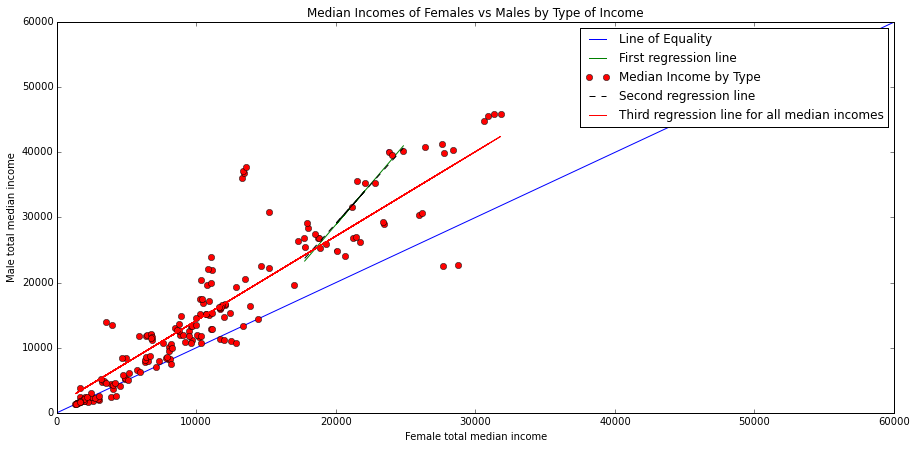

In [254]:
#fit line

cor2 = stats.spearmanr(all_median_females, all_median_males)
print cor2
beta1_all=cor2[0]*all_median_males.std()/all_median_females.std()
beta0_all=all_median_males.mean()-beta1_all*all_median_females.mean()

print beta1_all, beta0_all

coefficients3 = (beta1_all,beta0_all)

polynomial3 = np.poly1d(coefficients3)
all_median_Ys = polynomial3(all_median_females)

fig = pl.figure(figsize=(15,7))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Male total median income')
ax1.set_xlabel('Female total median income')
ax1.set_title('Median Incomes of Females vs Males by Type of Income')
ax1.set_ylim([0,60000])
ax1.set_xlim([0,60000])

race_colors = {'all':'red','asian':'blue','black':'black','hispanic':'green','white':'purple'}
#for race in allfemales:
 #   print race

#print allfemales['all'].head(5)
for race in allfemales:
    ax1.scatter(allfemales[race]['Median income'][1],allmales[race]['Median income'][1],s=20,edgecolor='none',color = race_colors[race])

ax1.plot([0,60000],[0,60000],'-b',label='Line of Equality')
ax1.plot(arrayFemalePoint,newY,linewidth=1,color='green',label='First regression line')
ax1.plot(all_median_females, all_median_males, 'ro',label='Median Income by Type')

coefficients2 = [beta1,beta0]
polynomial2 = np.poly1d(coefficients2)
anotherY = polynomial2(arrayFemalePoint)

ax1.plot(arrayFemalePoint,anotherY,"--k",label='Second regression line')

ax1.plot(all_median_females,all_median_Ys,"-r",label='Third regression line for all median incomes')

ax1.legend()


In [217]:
##remove
##this was my final plot. yours do not have to look like this, this is just an example
#for your convenience.

In [225]:
z= 1.2966424397*100000 + 1209.53139055
print z

130873.775361
